# Step-by-step walkthrough...

This is...bla bla bla

In [33]:
# Run the script and set plot inline
%matplotlib inline
%run C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/GrainSizeTools_script.py

Once you run the script, a welcome message and a list of the main functions will appear on the console.

## Pandas basics: load datasets and visualize the data

[Pandas](https://pandas.pydata.org/about/index.html) is the de-facto standard Python library for data analysis and manipulation of table-like datasets (csv, excel or txt files among others). The library includes several tools for reading and handling of missing data. We recommend its use with the GrainSizeTools script.

Below we provide some examples

## Importing a dataset using pandas

In [34]:
dataset = pd.read_csv('DATA/data_set.txt', sep='\t')

In [35]:
dataset

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970
...,...,...,...,...,...,...,...,...,...,...,...
2656,2657,452.50,0.789,28.504,1368.0,1565.5,127.875,22.500,1.235,0.810,0.960
2657,2658,1081.25,0.756,47.909,1349.5,1569.5,108.246,31.363,1.446,0.692,0.960
2658,2659,513.50,0.720,32.962,1373.0,1586.0,112.286,20.496,1.493,0.670,0.953
2659,2660,277.75,0.627,29.436,1316.0,1601.5,159.102,17.002,1.727,0.579,0.920


In [36]:
# Estimate the apparent diameters from the areas and store them in a column named 'diameters'
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)
dataset.head()

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,diameters
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937,14.149803
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972,51.210889
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972,49.974587
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947,83.137121
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970,21.821815


In [37]:
get.functions_list()


METHODS AVAILABLE
List of main functions
summarize              -> estimate... 
conf_interval          -> estimate the confidence interval...

plot.distribution
plot.area_weighted
plot.normalized
plot.qq_plot

stereology.Saltykov
stereology.calc_shape

You can get more information about the methods in the following ways:
    (1) Typing help plus the name of the function e.g. help(calc_shape)
    (2) In the Spyder IDE by writing the name of the function and clicking Ctrl + I
    (3) Visiting the script documentation at https://marcoalopez.github.io/GrainSizeTools/
    (4) Get a list of the methods available: get.function_list()



In [38]:
summarize(dataset['diameters'])

 
CENTRAL TENDENCY ESTIMATORS
Arithmetic mean = 34.79 microns
Confidence intervals at 95.0 %
ASTM method: 34.09 - 35.48, (±2.0%), length = 1.393
mCox method: 34.43 - 36.04 (-1.0%, +3.6%), length = 1.616
Geometric mean = 30.10 microns
Confidence interval at 95.0 %
CLT method: 29.47 - 30.75 (-2.1%, +2.2%), length = 1.283
Median = 31.53 microns
Confidence interval at 95.0 %
robust method: 30.84 - 32.81 (-2.2%, +4.1%), length = 1.970
Mode (KDE-based) = 24.31 microns
Maximum precision set to 0.1
KDE bandwidth = 4.01 (silverman rule)
 
DISTRIBUTION FEATURES
Standard deviation = 18.32 (1-sigma)
Interquartile range (IQR) = 23.98
Lognormal shape (Multiplicative Standard Deviation) = 1.75
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.94, 0.00 (test statistic, p-value)


In [39]:
average = np.log(20)  # set sample geometric mean to 20
SD = np.log(1.5)  # set lognormal shape to 1.5

# generate a random lognormal population of size 250
np.random.seed(seed=1)
log_dataset = np.random.lognormal(mean=average, sigma=SD, size=500)

## Get description

First we are going to generate descriptive statistics which include different central tendency estimators (averages), the confidence intervals, and several distribution features such as dispersion and shape. For this we call the function ```summarize``` and pass the dataset:

In [40]:
summarize(log_dataset)

 
CENTRAL TENDENCY ESTIMATORS
Arithmetic mean = 22.13 microns
Confidence intervals at 95.0 %
ASTM method: 21.33 - 22.93, (±3.6%), length = 1.596
mCox method: 21.35 - 22.98 (-3.5%, +3.8%), length = 1.623
Geometric mean = 20.44 microns
Confidence interval at 95.0 %
CLT method: 19.73 - 21.17 (-3.5%, +3.6%), length = 1.441
Median = 20.32 microns
Confidence interval at 95.0 %
robust method: 19.33 - 21.42 (-4.9%, +5.4%), length = 2.096
Mode (KDE-based) = 17.66 microns
Maximum precision set to 0.1
KDE bandwidth = 2.78 (silverman rule)
 
DISTRIBUTION FEATURES
Standard deviation = 9.07 (1-sigma)
Interquartile range (IQR) = 11.44
Lognormal shape (Multiplicative Standard Deviation) = 1.49
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.93, 0.00 (test statistic, p-value)


By default, this function returns:

- Different **central tendency estimators** ("averages") including by default the arithmetic and geometric means, the median, and the mode.
- The **confidence intervals** for the different averages at 95% of certainty (excepting the mode) both in absolute and in percentage relative to the average (*a.k.a* coefficient of variation). The meaning of these intervals are that given the observed data, there is a 95% probability that the true value of grain size falls within the credible region.
- The methods used to estimate the confidence intervals for each average (excepting for the mode). By default the function summarize will choose the optimal method depending on distribution features.
- Two disperison measures, the standard deviation and the interquartile range.
- The lognormal shape
- A Shapiro-Wilk test warning indicating whether the data is not normally and/or lognormally distributed (when p-value < 0.05)

...

In [41]:
help(summarize)

Help on function summarize in module __main__:

summarize(data, avg=('amean', 'gmean', 'median', 'mode'), ci_level=0.95, bandwidth='silverman', precision=0.1)
    Estimate different grain size statistics. This includes different means,
    the median, the frequency peak grain size via KDE, the confidence intervals
    using different methods, and the distribution features.
    
    Parameters
    ----------
    data : array_like
        the diameters (apparent or not) of the grains
    
    avg : string, tuple or list. Optional
        the averages to be estimated
    
        | Types:
        | 'amean' - arithmetic mean
        | 'gmean' - geometric mean
        | 'median' - median
        | 'mode' - the kernel-based frequency peak of the distribution
    
    ci_level : scalar between 0 and 1, optional
        the certainty of the confidence interval (default = 0.95)
    
    bandwidth : string {'silverman' or 'scott'} or positive scalar, optional
        the method to estimate the b

we can see...

the certainty of the confidence interval that by default is set to 95% (0.95) meaning that the chance of obtaining a result outside the estimated margin of error is one in 20. The use of 95 % is common in statistic, but this number is no better or worse than others, and for example 90 (one in 10) 99 (one in 100), 95.45 (a.k.a. 2-sigma) are also common. If we want to set a different confidence interval is as follows:


In [43]:
summarize(dataset['diameters'], avg='gmean', ci_level=0.99)

Geometric mean = 30.10 microns
Confidence interval at 99.0 %
CLT method: 29.27 - 30.96 (-2.8%, +2.8%), length = 1.687
 
DISTRIBUTION FEATURES
Standard deviation = 18.32 (1-sigma)
Lognormal shape (Multiplicative Standard Deviation) = 1.75
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.94, 0.00 (test statistic, p-value)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22690111388>)

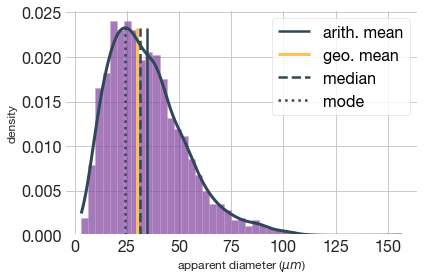

In [45]:
plot.distribution(dataset['diameters'])

In [47]:
help(plot.distribution)

Help on function distribution in module plot:

distribution(data, plot=('hist', 'kde'), avg=('amean', 'gmean', 'median', 'mode'), binsize='auto', bandwidth='silverman')
    Return a plot with the ditribution of (apparent or actual) grain sizes
    in a dataset.
    
    Parameters
    ----------
    diameters : array_like
        the apparent diameters of the grains
    
    plot : string, tuple or list
        the type of plot, either histogram ('hist'), kernel density estimate
        ('kde') or both ('hist', 'kde'). Default is both.
    
    avg : string, tuple or list
        the central tendency measures o show, either the arithmetic ('amean')
        or geometric ('gmean') means, the median ('median'), and/or the
        KDE-based mode ('mode'). Default all averages.
    
    binsize : string or positive scalar, optional
        If 'auto', it defines the plug-in method to calculate the bin size.
        When integer or float, it directly specifies the bin size.
        Default: t

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2269003d648>)

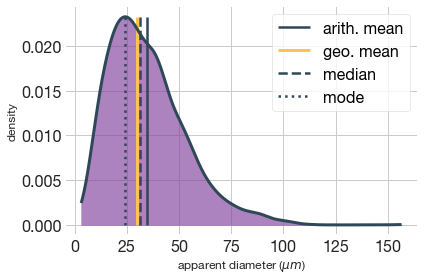

In [48]:
plot.distribution(dataset['diameters'], plot='kde')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2268fc0da48>)

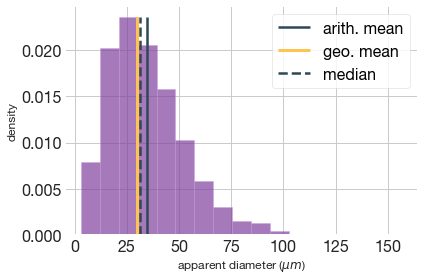

In [49]:
plot.distribution(dataset['diameters'], plot='hist', binsize='doane')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22690245fc8>)

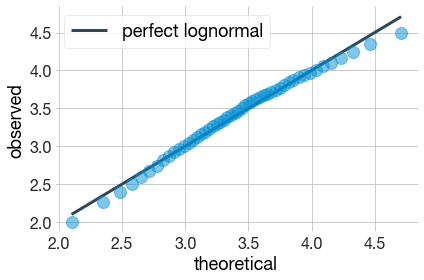

In [51]:
plot.qq_plot(dataset['diameters'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2268f64ecc8>)

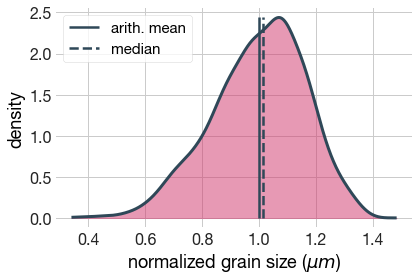

In [53]:
plot.normalized(dataset['diameters'], avg='amean')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2268f922d48>)

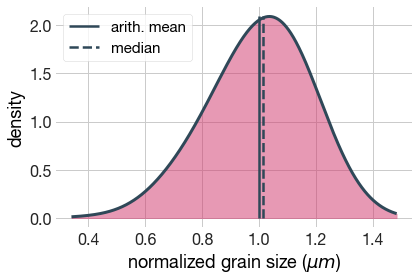

In [55]:
plot.normalized(dataset['diameters'], avg='amean', bandwidth=0.1)

bin size = 13.05


(<Figure size 936x360 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x22690207e48>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2268ff35088>))

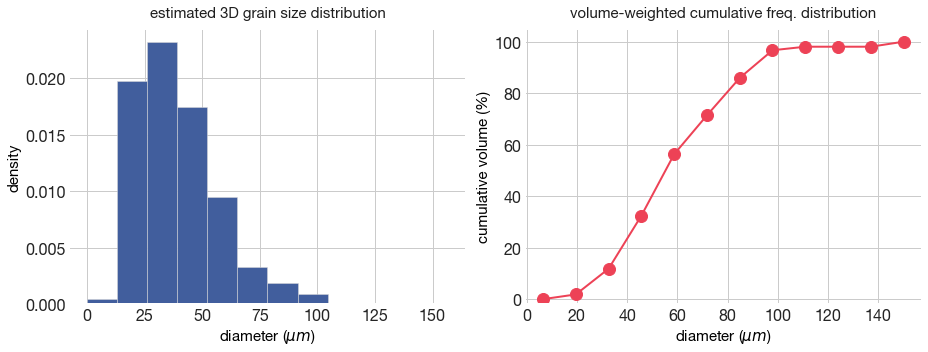

In [56]:
stereology.Saltykov(dataset['diameters'], numbins=12)

 
OPTIMAL VALUES
Number of classes: 11
MSD (log-normal shape) = 1.63 ± 0.06
Geometric mean (scale) = 36.05 ± 1.27
 


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2268fde0ac8>)

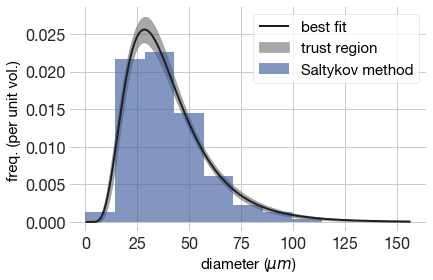

In [57]:
stereology.calc_shape(dataset['diameters'])